In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import kagglehub
import os

In [2]:
# === Simple linear regression: Predicting apartment price based on square footage ===

data = {
    'SquareMeters': [30, 40, 50, 60, 70, 80, 90],
    'Price': [50000, 65000, 70000, 85000, 95000, 110000, 125000]
}
df = pd.DataFrame(data)


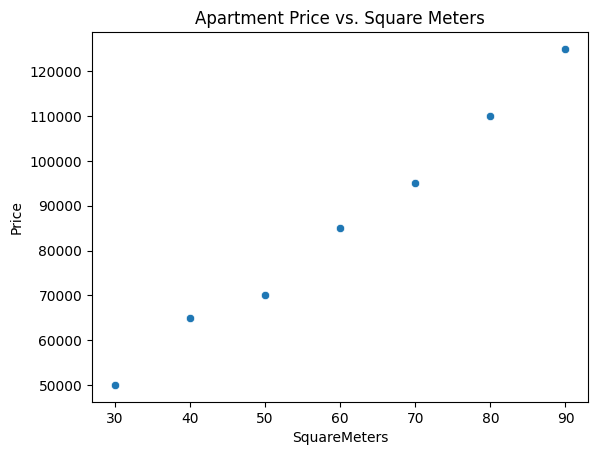

In [3]:
# Scatter plot
sns.scatterplot(x='SquareMeters', y='Price', data=df)
plt.title("Apartment Price vs. Square Meters")
plt.show()

In [4]:
# Model training
X = df[['SquareMeters']]
y = df['Price']
model = LinearRegression()
model.fit(X, y)
print("Coefficient (β1):", model.coef_[0])
print("Intercept (β0):", model.intercept_)


Coefficient (β1): 1214.2857142857144
Intercept (β0): 12857.14285714284


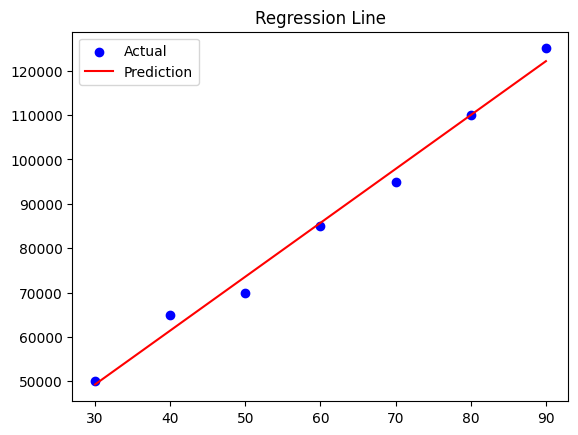

MAE: 2040.8163265306127
MSE: 6122448.979591837
R²: 0.9897260273972602


In [5]:
# Prediction and evaluation
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.legend()
plt.title("Regression Line")
plt.show()

print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("R²:", r2_score(y, y_pred))

In [6]:
# === Multiple linear regression ===

data = {
    'SquareMeters': [30, 40, 50, 60, 70],
    'Floor': [1, 2, 3, 4, 5],
    'Price': [55000, 65000, 75000, 85000, 95000]
}
df = pd.DataFrame(data)
X = df[['SquareMeters', 'Floor']]
y = df['Price']
model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [990.0990099   99.00990099]
Intercept: 25198.01980198016


In [7]:
# === Example with real data (health insurance dataset from Kaggle) ===

path = kagglehub.dataset_download('shivadumnawar/health-insurance-dataset')
csv_path = os.path.join(path, "Health_insurance.csv")
df = pd.read_csv(csv_path)


100%|██████████| 16.1k/16.1k [00:00<00:00, 12.1MB/s]

Extracting files...


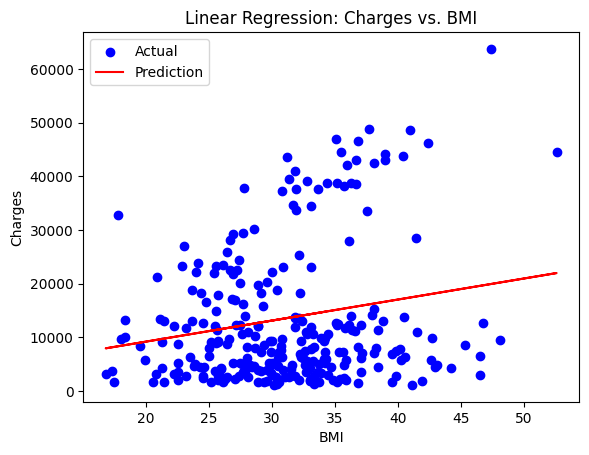

MAE: 9784.65259627133
MSE: 149085057.03839505
R²: 0.03970193117941878
Coefficient (b1): 392.43654416987977
Intercept (b0): 1353.0730722046683


In [8]:
# Simple regression: charges ~ bmi
X = df[['bmi']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Prediction')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Linear Regression: Charges vs. BMI")
plt.legend()
plt.show()

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("Coefficient (b1):", model.coef_[0])
print("Intercept (b0):", model.intercept_)


In [9]:
# Multiple regression: charges ~ age + bmi + children
X_multi = df[['age', 'bmi', 'children']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)
print("R² score (multiple regression):", r2_score(y_test, y_pred_multi))


R² score (multiple regression): 0.15489592484270776


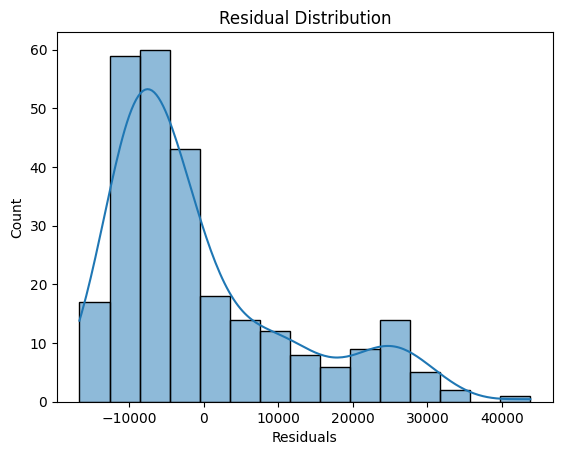

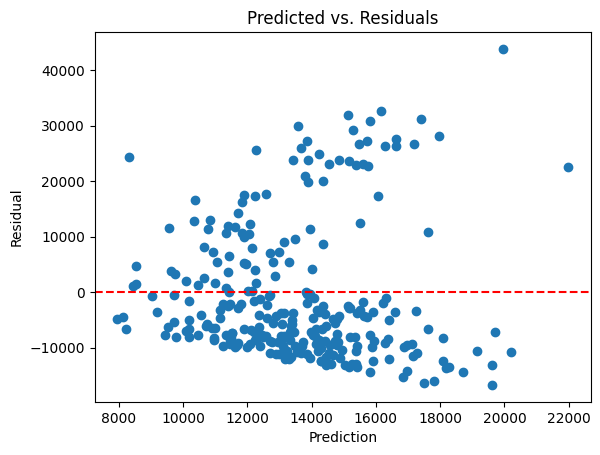

In [10]:
# Residual analysis
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Predicted vs. Residuals")
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.show()